### 读取数据并确认数据大小

In [ ]:
import nibabel as nib
import numpy as np
import os

BASE_DIR = os.path.dirname(os.getcwd()) # 假设脚本在src下，获取项目根目录
IMG_ID = "10"
FILE_NAME = "train_10_a_1.nii.gz"

BASE_DIR = "/home/fpf/Med_LLM/data"
IMG_ID = {
    '1': ['1', '2'],
    '10': ['1', '2'],
    '100': ['1', '2']
}

print(f"项目根目录: {BASE_DIR}")

for img_id, sub_ids in IMG_ID.items():
    for sub_id in sub_ids:
        file_name = f"train_{img_id}_a_{sub_id}.nii.gz"
        image_path = os.path.join(BASE_DIR, "train_fix", img_id, file_name)
        mask_path = os.path.join(BASE_DIR, "mask_fix", img_id, file_name)

        print("="*50)

        print(f"正在检查影像: {image_path}")
        print("-"*50)

        try:
            # 加载影像
            image_nii = nib.load(image_path)
            image_data = image_nii.get_fdata()

            print("--- 影像信息 ---")
            print(f"影像尺寸 (Shape): {image_data.shape}")
            print(f"数据类型 (dtype): {image_data.dtype}")
            print(f"影像强度范围: Min={np.min(image_data):.2f}, Max={np.max(image_data):.2f}")
            print(f"头部信息 (Affine):\n{image_nii.affine}\n")

        except FileNotFoundError:
            print(f"错误: 找不到影像文件 {image_path}")
        except Exception as e:
            print(f"读取影像时发生错误: {e}")



        print("-"*50)
        print(f"正在检查掩膜: {mask_path}\n")
        print("-"*50)

        try:
            # 加载掩膜
            mask_nii = nib.load(mask_path)
            mask_data = mask_nii.get_fdata()

            print("--- 掩膜信息 ---")
            print(f"掩膜尺寸 (Shape): {mask_data.shape}")
            print(f"数据类型 (dtype): {mask_data.dtype}")

            # 查找掩膜中的唯一标签值，这是最关键的一步！
            unique_labels = np.unique(mask_data)
            print(f"掩膜中的唯一标签值: {unique_labels}")
            
            # 验证影像和掩膜的空间尺寸是否一致
            if image_data.shape == mask_data.shape:
                print("影像和掩膜的空间尺寸匹配。")
            else:
                print("警告: 影像和掩膜的空间尺寸不匹配！")

        except FileNotFoundError:
            print(f"错误: 找不到掩膜文件 {mask_path}")
        except Exception as e:
            print(f"读取掩膜时发生错误: {e}")


项目根目录: /home/fpf/Med_LLM/data
正在检查影像: /home/fpf/Med_LLM/data/train_fix/1/train_1_a_1.nii.gz
--------------------------------------------------
--- 影像信息 ---
影像尺寸 (Shape): (512, 512, 303)
数据类型 (dtype): float64
影像强度范围: Min=-8192.00, Max=8078.00
头部信息 (Affine):
[[-8.20906222e-01  0.00000000e+00  0.00000000e+00  2.16739548e+02]
 [ 0.00000000e+00 -8.20906222e-01  0.00000000e+00  3.73507538e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -1.14072400e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

--------------------------------------------------
正在检查掩膜: /home/fpf/Med_LLM/data/mask_fix/1/train_1_a_1.nii.gz

--------------------------------------------------
--- 掩膜信息 ---
掩膜尺寸 (Shape): (512, 512, 303)
数据类型 (dtype): float64
掩膜中的唯一标签值: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  31.  32.  33.  34.  35.  36.  37.
  38.  39.  40.  41.  42.  43.  44.  45.  46.  51.  52.  53.  54.  55.
  56.  57.  58.  59.

### 可视化

所有可视化结果将保存在: /home/fpf/Med_LLM/test



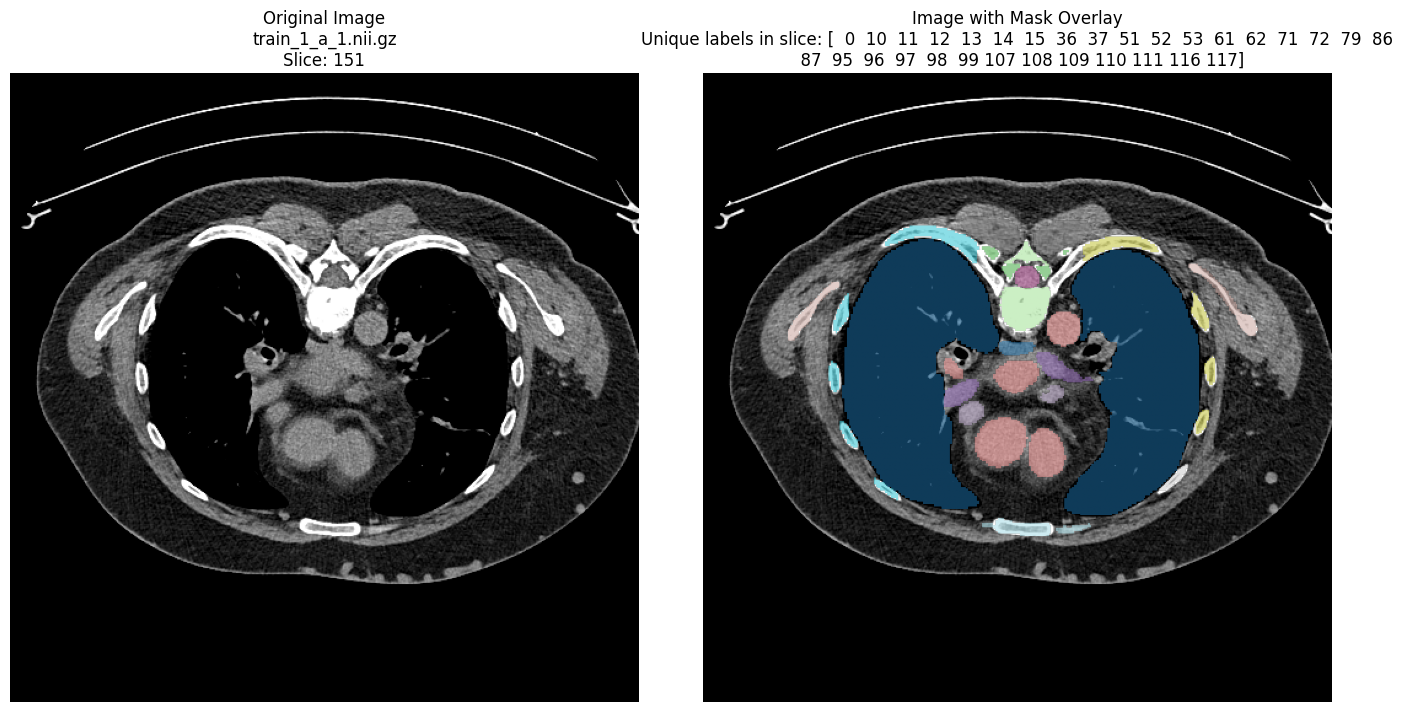

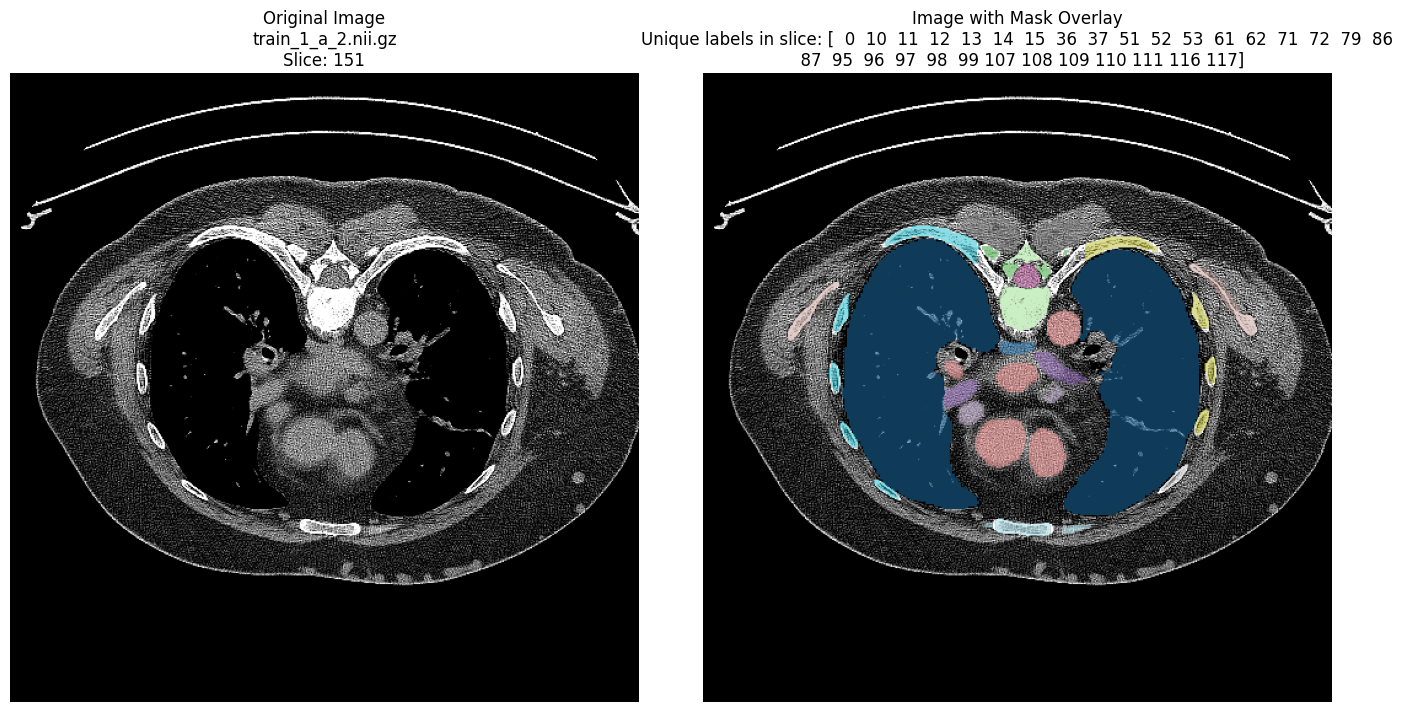

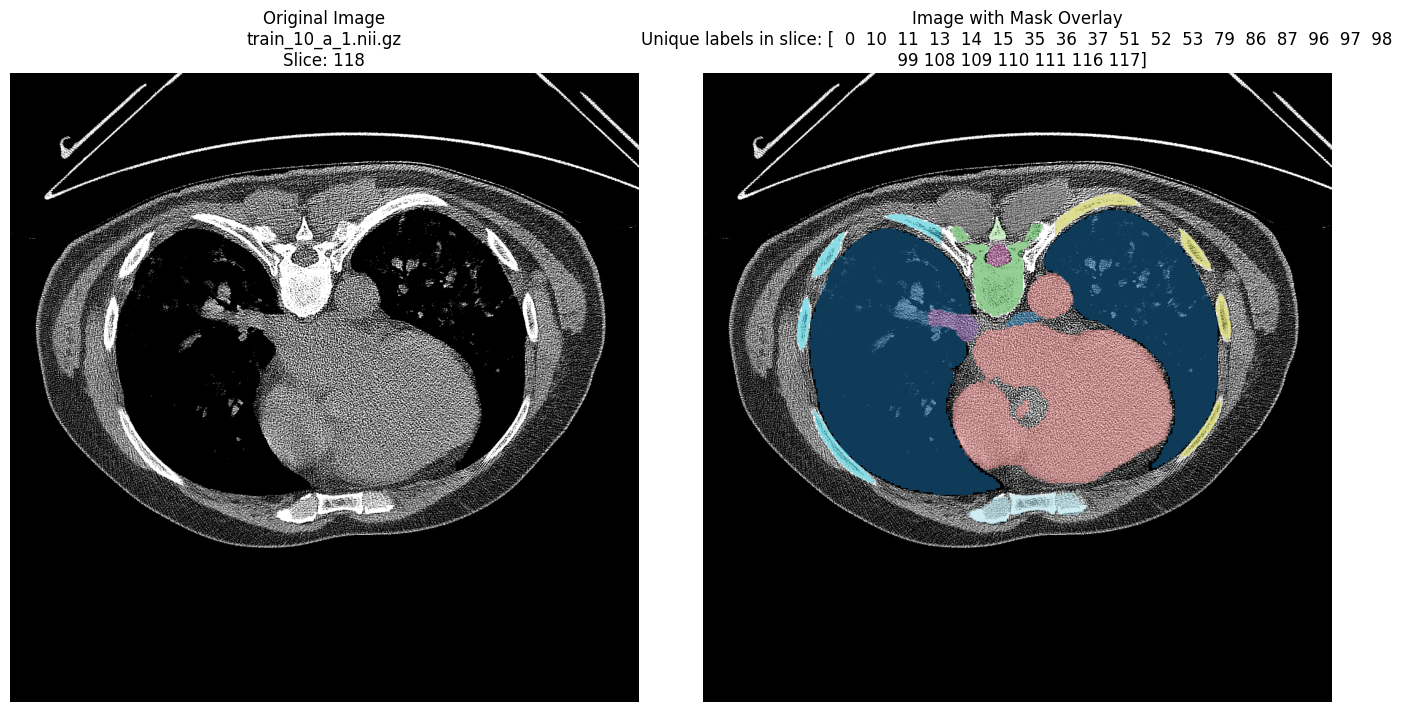

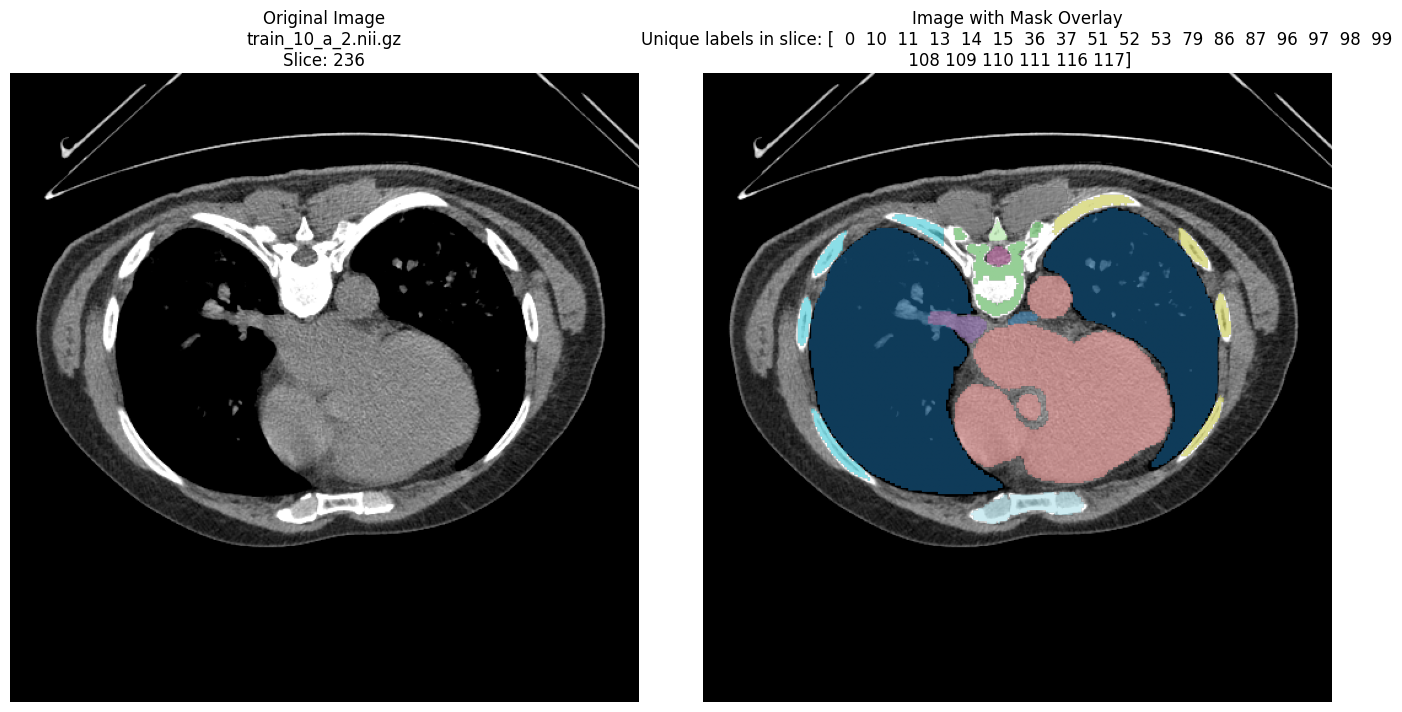

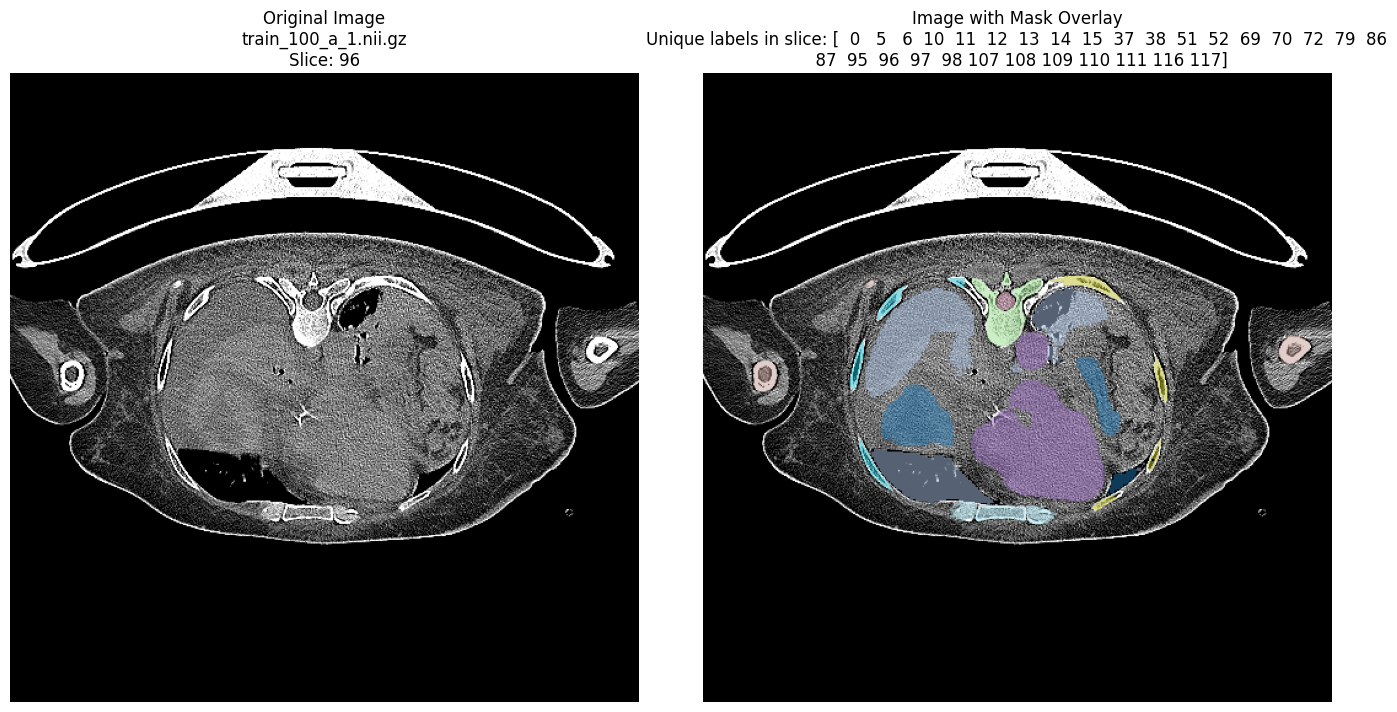

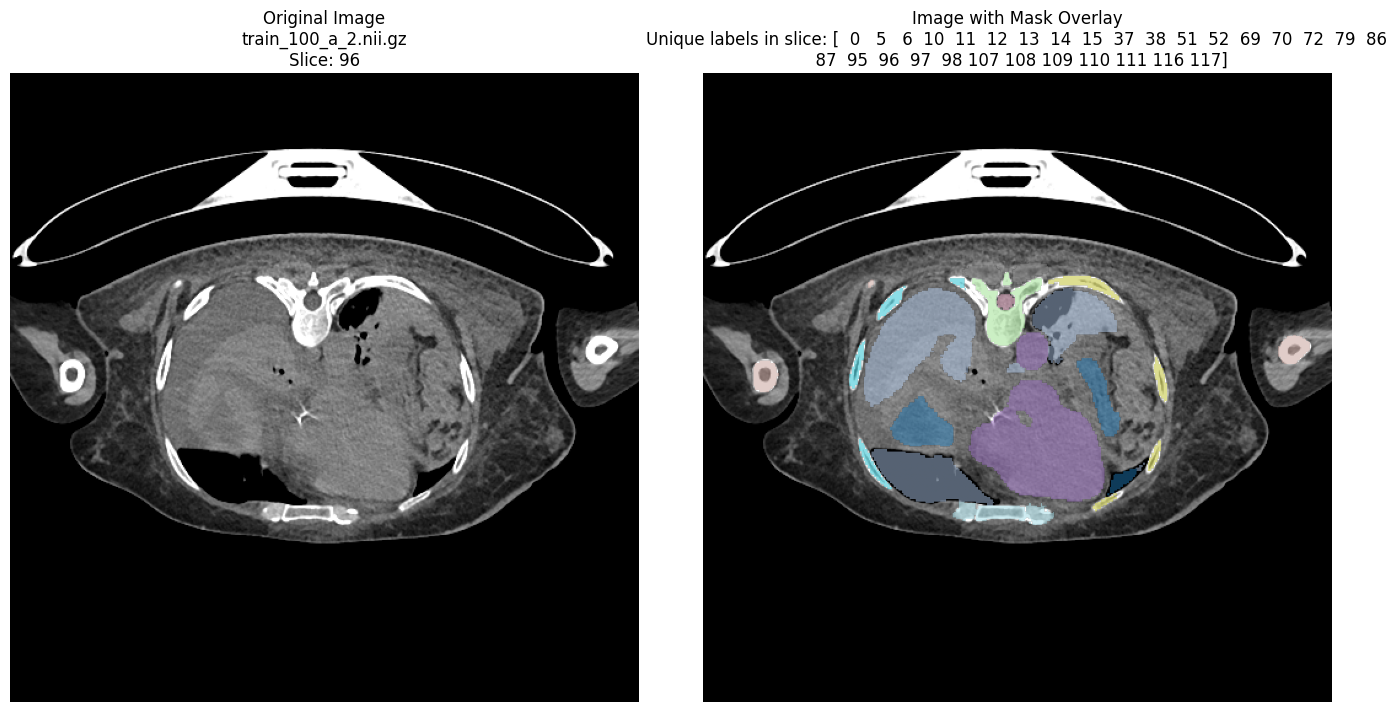


--- 可视化全部完成 ---


In [4]:
import matplotlib.pyplot as plt

OUTPUT_DIR = "/home/fpf/Med_LLM/test"
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"所有可视化结果将保存在: {OUTPUT_DIR}\n")

def normalize_ct_image(img_data):
    """将CT影像的HU值窗口化以便于观察软组织"""
    # 软组织窗口: 窗位40 HU, 窗宽400 HU
    window_level, window_width = 40, 400
    min_val = window_level - window_width // 2
    max_val = window_level + window_width // 2
    clipped = np.clip(img_data, min_val, max_val)
    normalized = (clipped - min_val) / (max_val - min_val)
    return normalized

# --- 3. 遍历所有文件并进行可视化 ---
# (沿用你之前的循环逻辑)

for img_id, sub_ids in IMG_ID.items():
    for sub_id in sub_ids:
        file_name = f"train_{img_id}_a_{sub_id}.nii.gz"
        image_path = os.path.join(BASE_DIR, "train_fix", img_id, file_name)
        mask_path = os.path.join(BASE_DIR, "mask_fix", img_id, file_name)

        try:
            # 加载数据 (假设上一个单元格已经验证过文件存在)
            image_nii = nib.load(image_path)
            image_data = image_nii.get_fdata()

            mask_nii = nib.load(mask_path)
            mask_data = mask_nii.get_fdata()

            # --- 可视化核心逻辑 ---
            
            # a. 选取中间的横断面切片进行展示
            slice_index = image_data.shape[2] // 2
            
            image_slice = image_data[:, :, slice_index]
            mask_slice = mask_data[:, :, slice_index]

            # b. 对CT影像进行窗口化处理以获得更好视觉效果
            image_slice_normalized = normalize_ct_image(image_slice)

            # c. 创建一个包含两个子图的画布
            fig, axes = plt.subplots(1, 2, figsize=(14, 7))

            # d. 在第一个子图上显示原图
            axes[0].imshow(np.rot90(image_slice_normalized), cmap='gray')
            axes[0].set_title(f"Original Image\n{file_name}\nSlice: {slice_index}", fontsize=12)
            axes[0].axis('off')

            # e. 在第二个子图上显示原图+掩膜
            axes[1].imshow(np.rot90(image_slice_normalized), cmap='gray')
            # 将掩膜中背景(标签为0)的部分设为透明
            masked_mask = np.ma.masked_where(mask_slice == 0, mask_slice)
            # 以半透明、彩色方式叠加掩膜
            axes[1].imshow(np.rot90(masked_mask), cmap='tab20', alpha=0.5)
            axes[1].set_title(f"Image with Mask Overlay\nUnique labels in slice: {np.unique(mask_slice).astype(int)}", fontsize=12)
            axes[1].axis('off')

            plt.tight_layout()

            # f. 保存整个画布为一张图片
            output_filename = os.path.join(OUTPUT_DIR, f"visual_{file_name.replace('.nii.gz', '')}_slice_{slice_index}.png")
            plt.savefig(output_filename)
            
            # g. 在Jupyter Notebook中直接显示图像
            plt.show()

        except Exception as e:
            print(f"处理文件 {file_name} 时发生错误: {e}")

print("\n--- 可视化全部完成 ---")